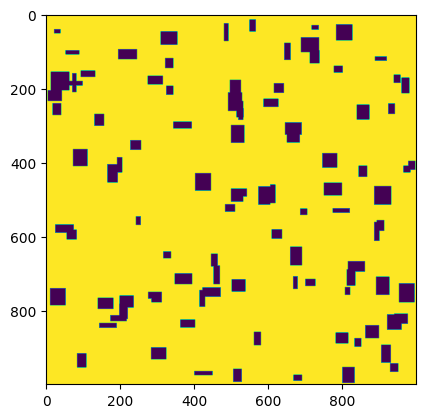

In [2]:
import matplotlib.pyplot as plt
from eval_metrics import cal_bend, cal_path_length
plt.imshow(plt.imread("./generated_images/o6_sparse.png"))

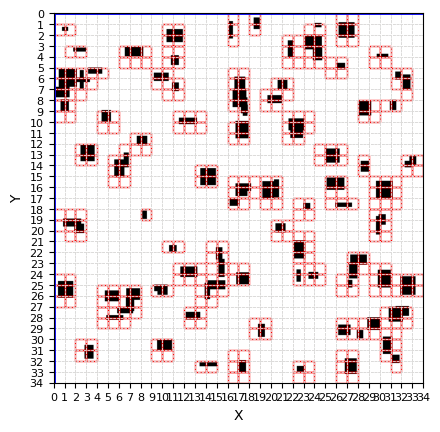

In [3]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./generated_images/o6_sparse.png", grid_size=30)
map.draw_coordinate_system()

In [4]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 140
Elapsed Time: 0.004820108413696289 seconds
Bends:  14
Path length:  50.183766184073555


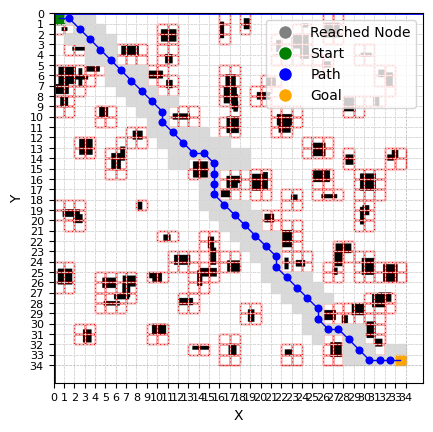

In [5]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
states = path_states(node)

print("Bends: ", cal_bend(states))
print("Path length: ", cal_path_length(states))

map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached:  133
Elapsed Time: 0.004990100860595703 seconds
Bends:  14
Path length:  50.183766184073555


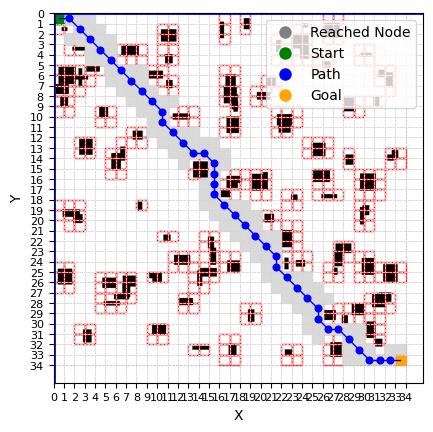

In [6]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
path = path_states(node)

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {end_time - start_time} seconds")
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [7]:
from path_smooth.path_smooth import simplify_path
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
path = path_states(node)
simplified_path = simplify_path(path, map)
end_time = time.time()


print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {end_time - start_time} seconds")
print("Bends: ", cal_bend(simplified_path))
print("Path length: ", cal_path_length(simplified_path))


Reached:  133
Elapsed Time: 0.20592093467712402 seconds
Bends:  17
Path length:  48.279898118087516


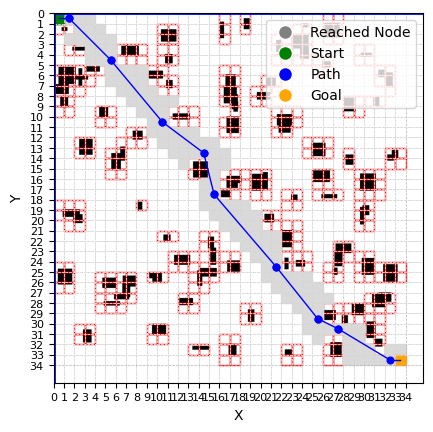

In [8]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  9269
------------Generation 1 -----------------
Population size:  9269
Before selection, population size:  9269
After selection, population size:  9176
Before crossover, two first parents: 
[0, 1, 36, 71, 106, 140, 175, 210, 245, 280, 315, 349, 384, 419, 454, 488, 522, 557, 592, 627, 662, 697, 732, 767, 802, 836, 871, 906, 941, 976, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1154, 1155]
[0, 1, 36, 71, 106, 140, 175, 210, 245, 280, 315, 349, 384, 419, 454, 488, 522, 557, 592, 627, 662, 697, 732, 767, 802, 836, 871, 906, 941, 976, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1154, 1155]
After crossover, two first parents: 
[0, 1, 36, 71, 106, 140, 175, 210, 245, 280, 315, 349, 384, 419, 454, 488, 522, 557, 592, 627, 662, 697, 732, 767, 802, 836, 871, 906, 941, 976, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1154, 1155]
[0, 1, 36, 71, 106, 140, 175, 210, 245, 280, 315, 349, 384, 419, 454, 488, 522, 557, 592, 627, 662, 697, 732, 767, 

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)
/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cosine_theta = dot_product / (norm_BA * norm_BC)


Mean fit_value:  -12782.581262022506
Mean path_value:  49.38625577767271
Mean smooth_value:  117.9485614646905
Best path:  [0, 1, 36, 71, 140, 175, 279, 348, 383, 522, 557, 627, 697, 767, 871, 1011, 1046, 1047, 1082, 1151, 1155]
------------Generation 2 -----------------
Population size:  9176
Before selection, population size:  9176
After selection, population size:  9084
Before crossover, two first parents: 
[0, 1, 36, 71, 140, 175, 280, 349, 384, 522, 557, 627, 697, 767, 871, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1155]
[0, 1, 36, 71, 140, 175, 280, 349, 384, 522, 557, 627, 697, 767, 871, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1155]
After crossover, two first parents: 
[0, 1, 36, 71, 140, 175, 280, 349, 384, 522, 557, 627, 697, 767, 871, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1155]
[0, 1, 36, 71, 140, 175, 280, 349, 384, 522, 557, 627, 697, 767, 871, 1011, 1046, 1047, 1082, 1117, 1118, 1153, 1155]
Before mutation: [0, 1, 36, 71, 140, 175, 280, 349, 384, 522, 557, 627, 697, 

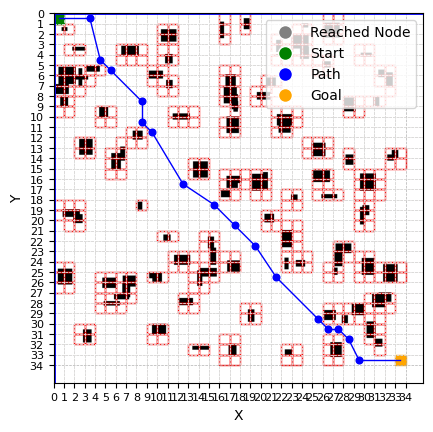

In [9]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
start_time = time.time()
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=10, ant_number=10, 
                p_crossover=1, p_mutation=0.05, verbose=True)
end_time = time.time()
path = convert_path_to_xy(best_path[-1], cols)
print("Elapsed time: ", end_time-start_time)
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])

In [10]:
# Evaluation for A*
from cal_runtime import cal_runtime
cal_runtime(explorer=explorer)

a_runtime:  0.0026142144203186034
b_runtime:  0.002225782871246338
c_runtime:  0.20830919981002807
